In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_ = pd.read_csv('Churn_Modelling.csv')

In [3]:
df_.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df = df_[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# let's check null values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### There are no null values in the data set, as the data set was very clean

In [7]:
# let's try to convert gender in to numericals
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})

C:\Users\phani\AppData\Local\Temp\ipykernel_18692\1631226096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})


In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# let's check how many countries are there
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
# as there are only three countries we can replace them by using the replace function
df['Geography'] = df['Geography'].replace({'France': 1, 'Germany': 0, 'Spain' : 2})

C:\Users\phani\AppData\Local\Temp\ipykernel_18692\409320725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Geography'] = df['Geography'].replace({'France': 1, 'Germany': 0, 'Spain' : 2})


In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


                 CreditScore  Geography    Gender       Age    Tenure  \
CreditScore         1.000000  -0.000478 -0.002857 -0.003965  0.000842   
Geography          -0.000478   1.000000  0.025446 -0.029824  0.002713   
Gender             -0.002857   0.025446  1.000000 -0.027544  0.014733   
Age                -0.003965  -0.029824 -0.027544  1.000000 -0.009997   
Tenure              0.000842   0.002713  0.014733 -0.009997  1.000000   
Balance             0.006268  -0.328736  0.012087  0.028308 -0.012254   
NumOfProducts       0.012238   0.011923 -0.021859 -0.030680  0.013444   
HasCrCard          -0.005458  -0.014734  0.005766 -0.011721  0.022583   
IsActiveMember      0.025651   0.022807  0.022544  0.085472 -0.028362   
EstimatedSalary    -0.001384  -0.010285 -0.008112 -0.007201  0.007784   
Exited             -0.027094  -0.138714 -0.106512  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
CreditScore      0.006268       0.012238  -0.005458 

<Axes: >

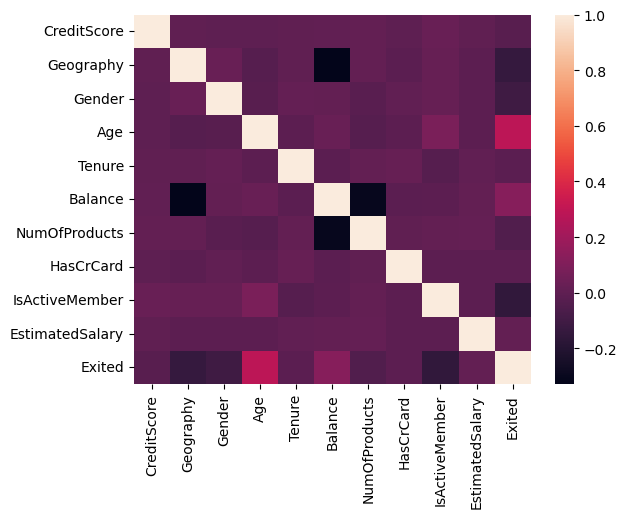

In [12]:
# let's check the correlation
print(df.corr())
sns.heatmap(df.corr())

### When we Observe the Correlation , we can say that any variable is not linearly or inversly correlated to any other variable, so we are going to use any of the non-linear algorithms

In [13]:
X = df[['CreditScore','Geography','Gender','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
Y = df[['Exited']]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=33)

In [15]:
print(X_train.shape)
print(X_test.shape)

(7500, 9)
(2500, 9)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [17]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

C:\Users\phani\AppData\Local\Temp\ipykernel_18692\688470177.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

In [18]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Accuracy: 0.8244
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2019
           1       0.58      0.31      0.41       481

    accuracy                           0.82      2500
   macro avg       0.72      0.63      0.65      2500
weighted avg       0.80      0.82      0.80      2500



In [19]:
# let's do with the Decision Tree
clf = DecisionTreeClassifier(max_depth=10)

clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10)

In [20]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Accuracy: 0.8184
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2019
           1       0.54      0.36      0.43       481

    accuracy                           0.82      2500
   macro avg       0.70      0.64      0.66      2500
weighted avg       0.80      0.82      0.80      2500



In [21]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [22]:
clf = xgb.XGBClassifier()
clf.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8228


In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [25]:
clf = AdaBoostClassifier()
clf.fit(X_train, Y_train)

C:\Users\phani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [27]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8268


# Doubt's remained

# where do we apply transformations

# how to analyze the data more

# does scaling the data can increase the Accuracy

# how select the features , based on what ways we can select the required features

In [28]:
from sklearn.decomposition import PCA

In [58]:
# Instantiate PCA
pca = PCA(n_components=9)  # Specify the number of components you want to keep

# Fit PCA
pca.fit(X)

# Transform data
X_pca = pca.transform(X)

# Analyze explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [5.41184046e-01 4.58814656e-01 1.29726427e-06 1.16142217e-09
 6.31303247e-11 4.14272615e-11 3.52260941e-11 3.36850384e-11
 2.87756414e-11]


In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca,Y, test_size=0.25, random_state=33)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

C:\Users\phani\AppData\Local\Temp\ipykernel_18692\2023326503.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

In [60]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Accuracy: 0.8272
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2019
           1       0.59      0.34      0.43       481

    accuracy                           0.83      2500
   macro avg       0.72      0.64      0.66      2500
weighted avg       0.81      0.83      0.81      2500



In [37]:
X_pca

array([[-76157.145994  ,  -7194.76164812],
       [  8266.91040009, -11846.10562508],
       [ 83998.63332421,  -7340.13343725],
       ...,
       [-80759.55511832,  51889.55592545],
       [ -1965.60625075,   7070.42404725],
       [ 48687.71624659,  65879.53100154]])